In [0]:
!pip install -q keras

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

from pandas import DataFrame
import numpy as np
import pandas as pd

from google.colab import files #lib to upload files

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_x, img_y = 28, 28

# load the MNIST data set, which already splits into train and test sets for us
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

In [7]:
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

In [12]:
history = AccuracyHistory()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.1603 - acc: 0.9527 - val_loss: 0.0414 - val_acc: 0.9871
Epoch 2/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0426 - acc: 0.9867 - val_loss: 0.0343 - val_acc: 0.9887
Epoch 3/10
57344/60000 [===========================>..] - ETA: 0s - loss: 0.0269 - acc: 0.9917

60000/60000 [==============================] - 7s 120us/step - loss: 0.0271 - acc: 0.9917 - val_loss: 0.0276 - val_acc: 0.9912
Epoch 4/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0199 - acc: 0.9935 - val_loss: 0.0325 - val_acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0153 - acc: 0.9952 - val_loss: 0.0221 - val_acc: 0.9934
Epoch 6/10
30720/60000 [==============>...............] - ETA: 3s - loss: 0.0123 - acc: 0.9961

60000/60000 [==============================] - 7s 116us/step - loss: 0.0126 - acc: 0.9961 - val_loss: 0.0312 - val_acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0117 - acc: 0.9960 - val_loss: 0.0274 - val_acc: 0.9920
Epoch 8/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0095 - acc: 0.9970 - val_loss: 0.0400 - val_acc: 0.9885
Epoch 9/10
26112/60000 [============>.................] - ETA: 3s - loss: 0.0060 - acc: 0.9981

60000/60000 [==============================] - 7s 116us/step - loss: 0.0076 - acc: 0.9977 - val_loss: 0.0349 - val_acc: 0.9910
Epoch 10/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0070 - acc: 0.9978 - val_loss: 0.0359 - val_acc: 0.9911


Test loss: 0.03592317256902029
Test accuracy: 0.9911


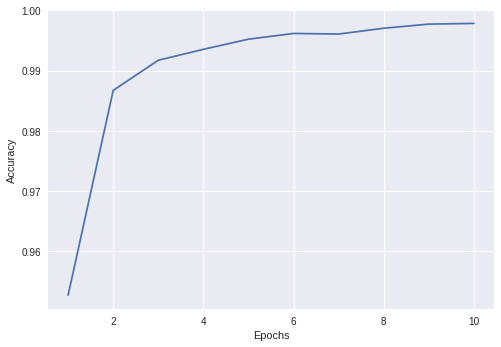

In [13]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [52]:
single_pred_arr = []
single_pred_arr.append(x_test[0])
single_pred_np = np.array(single_pred_arr)
model.predict(single_pred_np)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [0]:
prediction = model.predict(x_test)

In [15]:
prediction = np.argmax(prediction, axis = 1)
prediction = pd.Series(prediction, name='Label')
prediction.head()

0    7
1    2
2    1
3    0
4    4
Name: Label, dtype: int64

In [16]:
prediction.describe()

count    10000.000000
mean         4.435800
std          2.896674
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: Label, dtype: float64

In [17]:
pred = pd.concat([pd.Series(range(1,28001),name="ImageID"),prediction],axis=1)
pred.head()

,ImageID,Label
0,1,7.0
1,2,2.0
2,3,1.0
3,4,0.0
4,5,4.0


In [0]:
#prediction.to_csv("MNIST_CNN.csv",index=False)
#files.download("MNIST_CNN.csv")

In [0]:
#model.save("save")
#files.download("save")